In [73]:
import torch

import torchvision.datasets as datasets 
import torchvision.transforms as transforms 
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
import os
import pandas as pd
import cv2

In [74]:
class CustomDataset(Dataset):
    def __init__(self, image_paths, label_paths, train=True):
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.files = os.listdir(self.image_paths)
        self.lables = os.listdir(self.label_paths)
    def transform(self, image, mask):
        # Resize
        custom_size = (60,60) #임의로 지정한 사이즈
        # resize = transforms.Resize(size=(1000,200))  
        # image = resize(image)
        # mask.resize((1000,200))
        
        # Random crop
        i, j, h, w = transforms.RandomCrop.get_params(
            image, custom_size)
        image = TF.crop(image, i, j, h, w)
        mask = mask[i:i+h, j:j+w]
        print(i,j,h,w)
        # # Random horizontal flipping
        # if random.random() > 0.5:
        #     image = TF.hflip(image)
        #     mask = TF.hflip(mask)

        # # Random vertical flipping
        # if random.random() > 0.5:
        #     image = TF.vflip(image)
        #     mask = TF.vflip(mask)

        return image, mask

    def __getitem__(self,idx):
        img_name = self.files[idx]
        label_name = self.lables[idx]
        image = Image.open(os.path.join(self.image_paths,img_name))
        label = pd.read_csv(os.path.join(self.label_paths,label_name))
        x, y = self.transform(image, (label.values))
        return x, y

    def __len__(self):
        return len(self.files)

In [75]:
image1_path = '../../IMAGE/1/'
image2_path = '../../IMAGE/2'
image3_path = '../../IMAGE/3'
depth_path = '../../SCAN/Depth'

In [76]:
dataset_1 = CustomDataset(image_paths=image1_path, label_paths=depth_path)
# dataset_2 = CustomDataset(image_paths=image2_path, label_paths=depth_path)
# dataset_3 = CustomDataset(image_paths=image3_path, label_paths=depth_path)


In [77]:
dataset_1

1 231 60 60


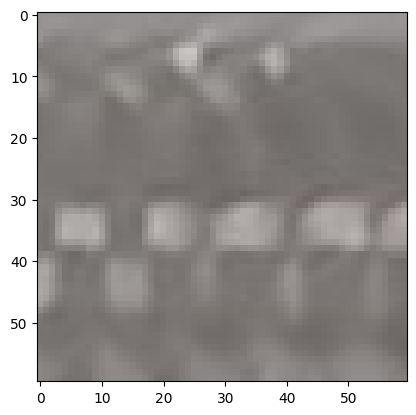

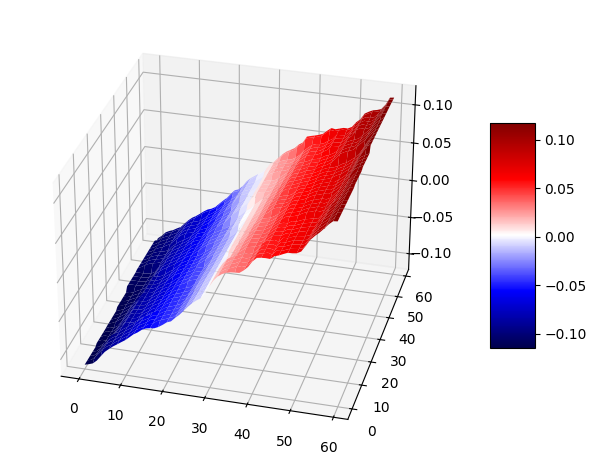

7 114 60 60


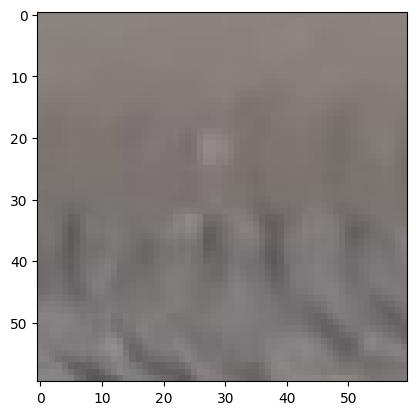

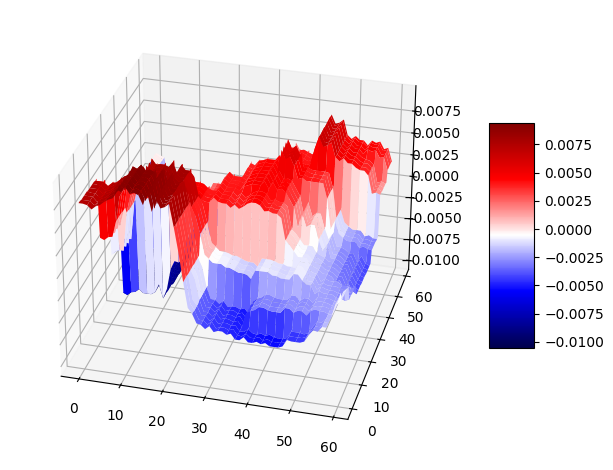

8 24 60 60


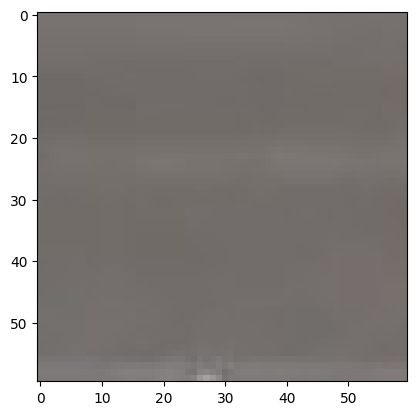

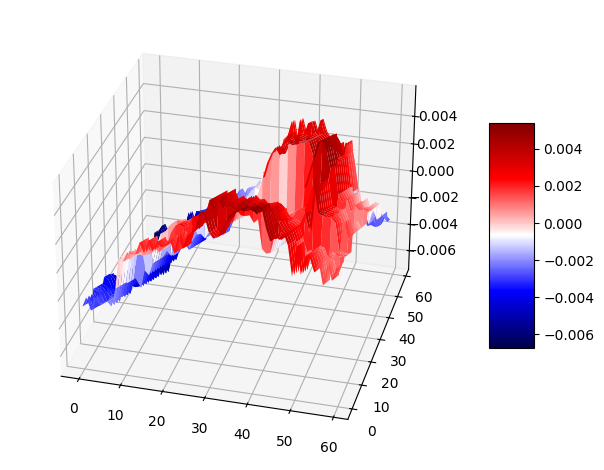

3 280 60 60


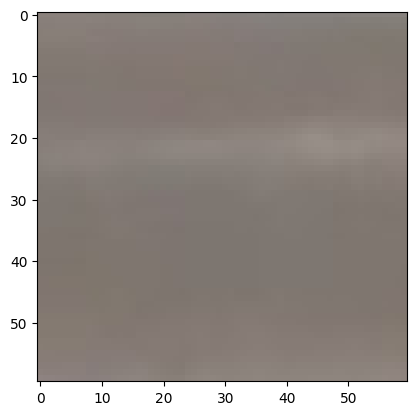

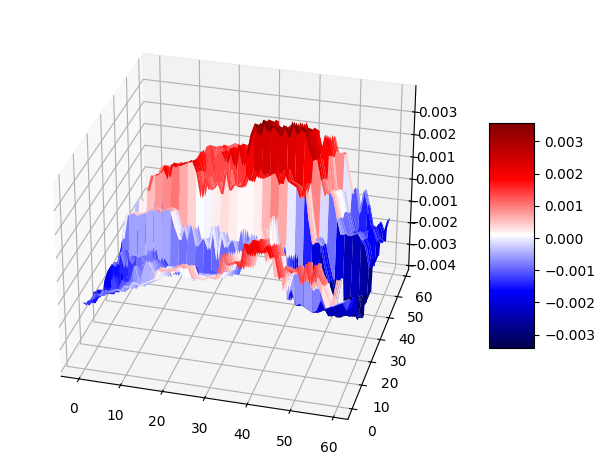

12 239 60 60


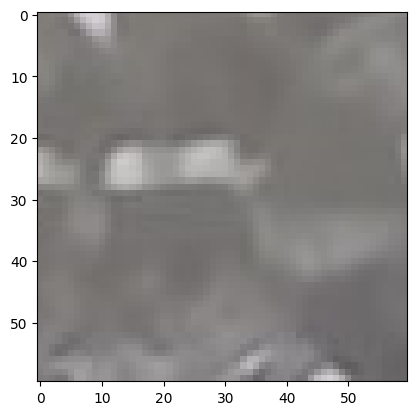

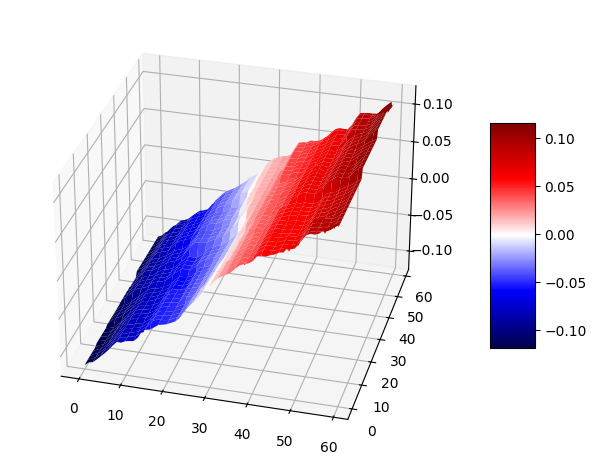

3 214 60 60


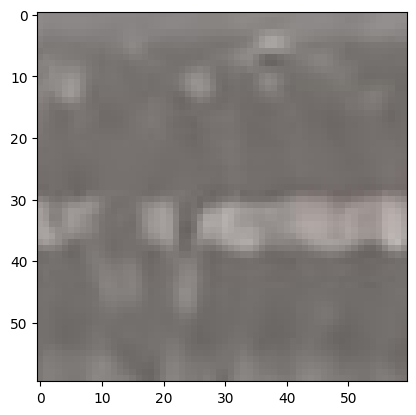

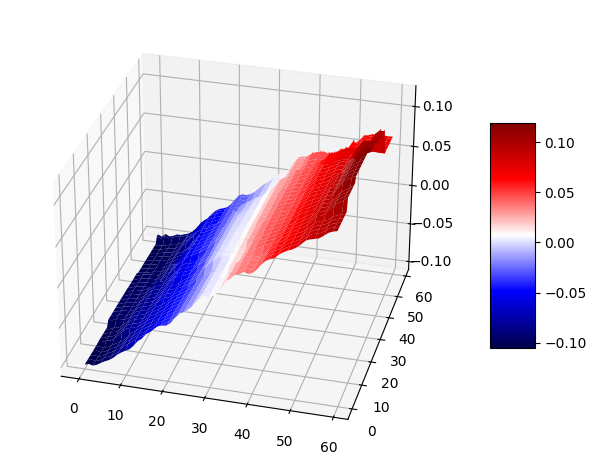

10 234 60 60


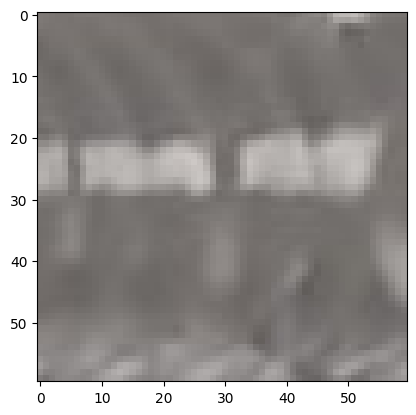

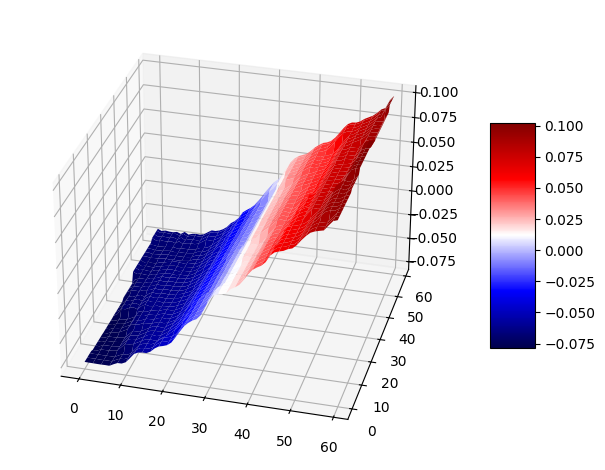

1 171 60 60


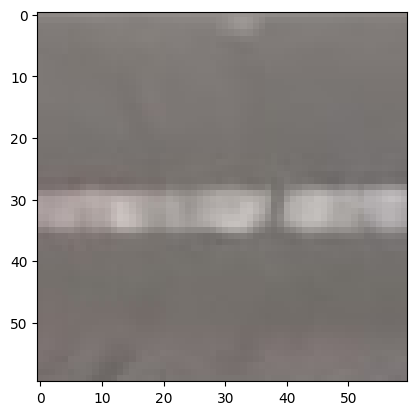

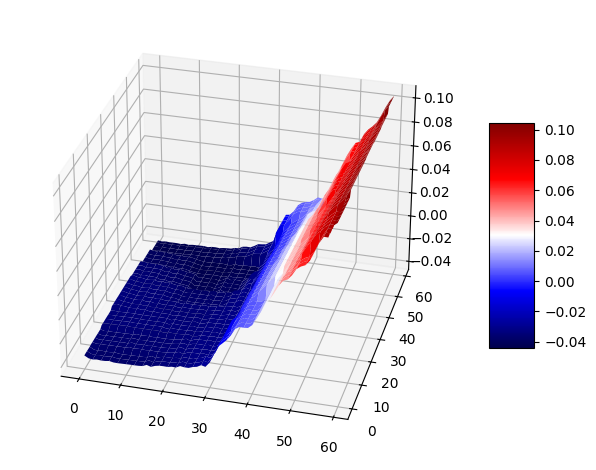

6 156 60 60


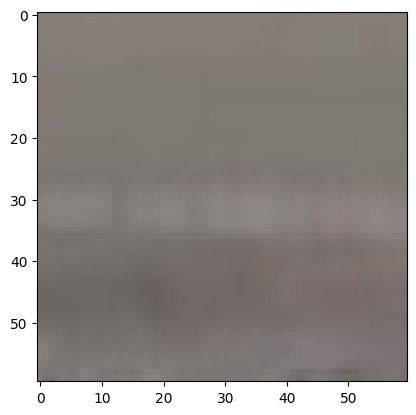

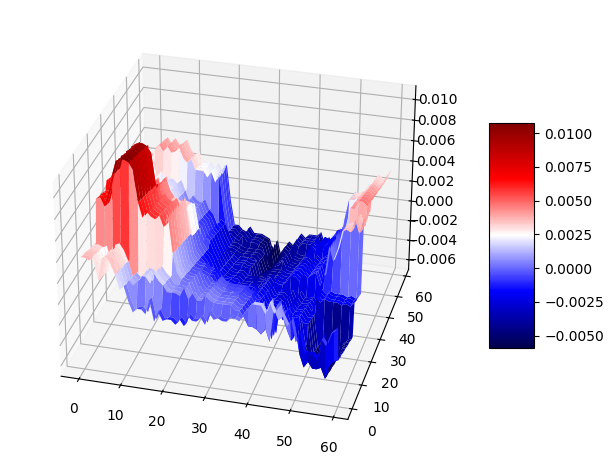

2 84 60 60


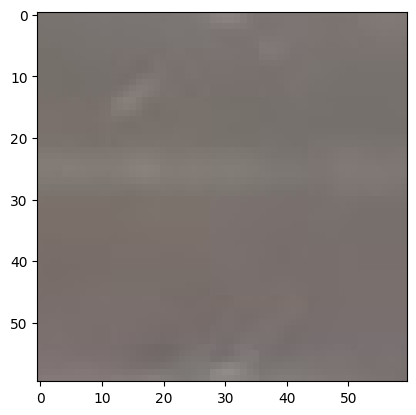

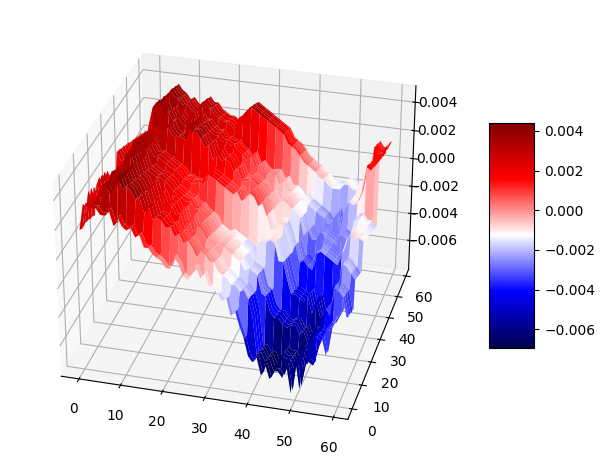

0 265 60 60


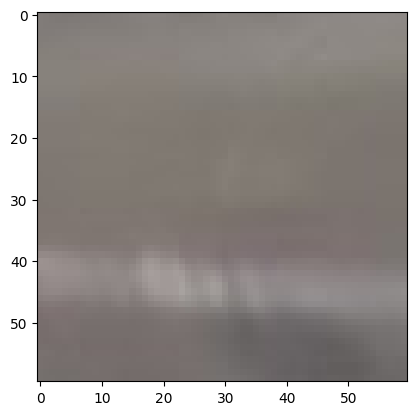

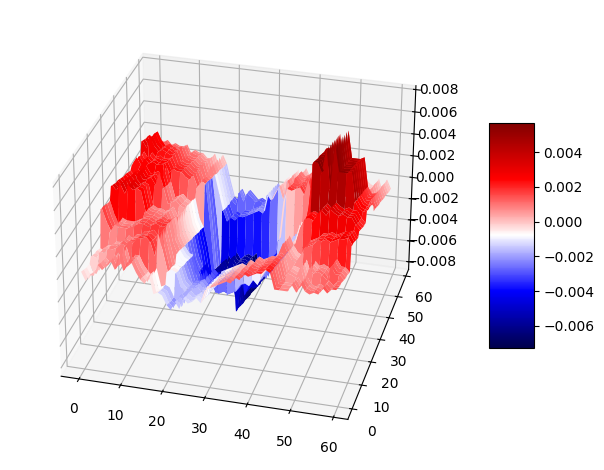

0 4 60 60


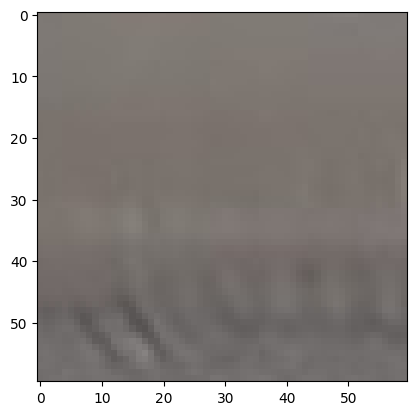

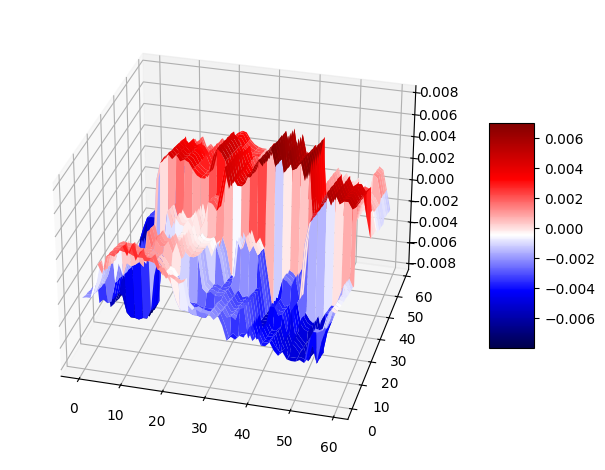

In [90]:
for image, depth in dataset_1:
    dt_crop = depth - np.mean(depth)
    dt_crop = dt_crop.T
    dt_crop = np.flip(dt_crop, axis = 1)
    dt_x = np.arange(0, dt_crop.shape[1])
    dt_y = np.arange(0, dt_crop.shape[0])
    dt_x, dt_y = np.meshgrid(dt_x, dt_y)

    
    ax = plt.figure(1).add_subplot()
    ax.imshow(image);  

    ax = plt.figure(2).add_subplot(projection='3d')
    surf = ax.plot_surface(dt_x, dt_y, dt_crop, linewidth=0, cmap=cm.seismic)
    ax.view_init(elev=30, azim=-75, roll=0)

 

    plt.colorbar(surf, shrink=0.5, aspect=5)
    plt.tight_layout()
    plt.show()